<a href="https://colab.research.google.com/github/lerakutt2/myprojects/blob/main/moad2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1RWKM4yliwb5uXVEKuPCjrTMAQawaBBKA?usp=sharing

# Метод опорных векторов.
1. В качестве исходных данных взять обучающие выборки из задания 1 (метод k-
ближайших соседей), сгенерированные с помощью функции make_blobs с использованием
разных значений для стандартного отклонения кластеров. Визуализировать данные.
2. Используя класс CSV библиотеки Scikit-Learn, обучить SVM-модель.
Проанализировать результаты обучения модели.
3. Определить класс объектов тестовой выборки из задания 1 (метод k-ближайших
соседей). Найти оптимальные значения гиперпараметров (в том числе ядра модели) для
исходных данных, имеющих разное стандартное отклонение кластеров. Обязательно
необходимо отобразить классифицируемые объекты на графике с исходными данными.
4. Написать функцию для визуализации границы принятия решений и опорных
векторов.
5. Для каждого случая построить матрицу несоответствий, проверить качество
получившихся моделей классификации, используя метрики из библиотеки Scikit-Learn2
(точность, полнота, особенность, выпадение, метрики ROC). Сделать выводы.

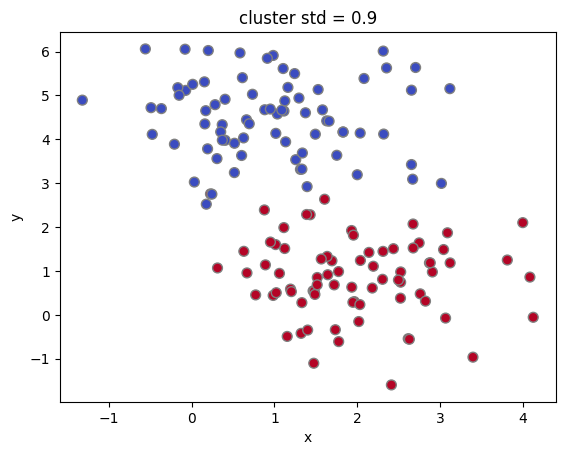

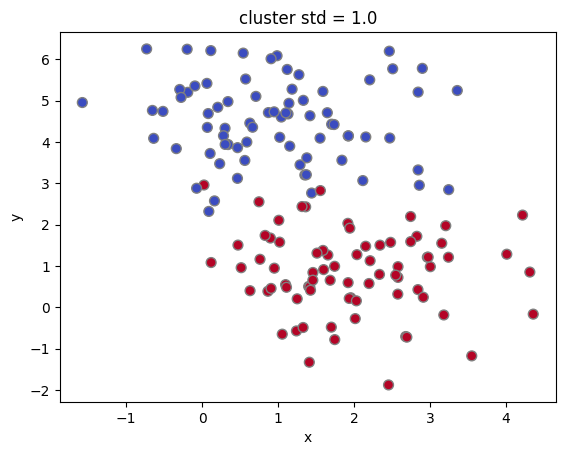

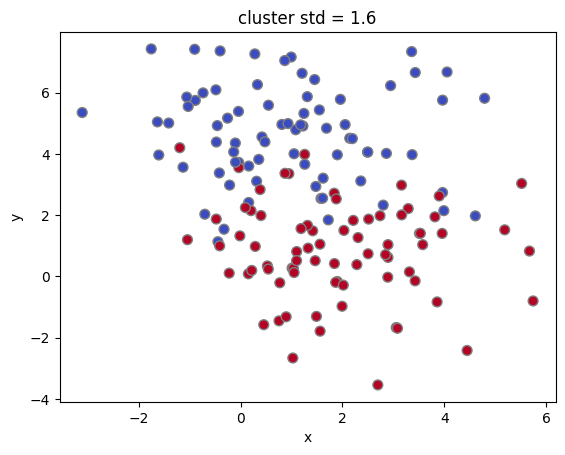

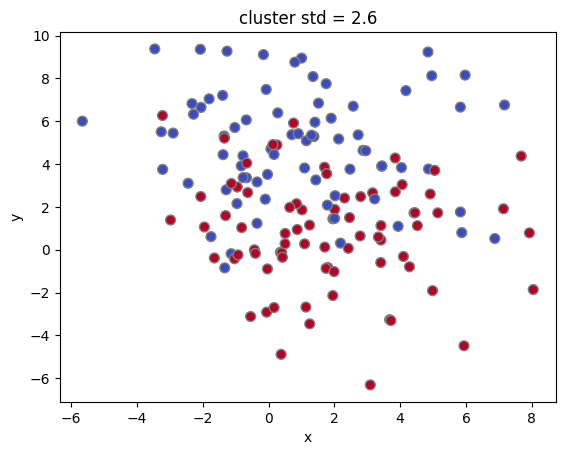

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

# генерация 4 датасетов с разными стандартными отклонениями классов
samples = 150
cluster_stds = [0.9, 1.0, 1.6, 2.6]
data_count = len(cluster_stds)
x = np.zeros((data_count, samples, 2))
y = np.zeros((data_count, samples), dtype=int)
for i in range(data_count):
  x[i], y[i] = make_blobs(n_samples=150, centers=2, n_features=2, random_state=0, cluster_std=cluster_stds[i])
  plt.scatter(x[i][:, 0], x[i][:, 1], c=y[i], edgecolor='grey', s=50, cmap='coolwarm')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('cluster std = ' + str(cluster_stds[i]))
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def fallout_score(y_true, y_pred):
  [tp, fn], [fp, tn] = confusion_matrix(y_true, y_pred)
  return fp / (tp + fn)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def print_metrics(y_pred, y_true):
  print('Доля правильных ответов:', accuracy_score(y_true, y_pred))
  print('Точность:', precision_score(y_true, y_pred))
  print('Полнота:', recall_score(y_true, y_pred))
  print('Площадь под ROC-кривой:', roc_auc_score(y_true, y_pred))
  print('Выпадение:', fallout_score(y_true, y_pred))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

# возможные значения параметров
C = [0.1, 0.5, 1, 2, 5, 10, 100, 200]
kernels = ['linear', 'sigmoid', 'poly']
all_scores = []
x_train = [0] * data_count
x_test = [0] * data_count
y_train = [0] * data_count
y_test = [0] * data_count

for i in range(data_count):
  x_train[i], x_test[i], y_train[i], y_test[i] = train_test_split(x[i], y[i], test_size = 0.2, random_state=5)
  for c in C:
    for k in kernels:
      # создание SVM модели с заданной комбинацией параметров
      clf = SVC(kernel=k, C=c)
      # кросс-валидация с использованием метрики f1
      scores = cross_val_score(clf, x_train[i], y_train[i], cv=5) #scoring='f1')
      # сохранение всех параметров и среднего метрик кросс-валидации
      all_scores.append([i, c, k, scores.mean()])

In [ ]:
import pandas as pd
scores = pd.DataFrame(all_scores)
params = []
for i in range(data_count):
  display(scores[scores[0] == i])
  # показывает при каких параметрах в каждом датасете достигается самая высокая точность
  display(scores[scores[3] == scores[scores[0] == i][3].max()])
  # сохраняет первую строку из получившейся таблицы, чтоюы затем обучить модель с этими параметрами
  params.append(scores[scores[3] == scores[scores[0] == i][3].max()].iloc[0, :3].to_list())

,0,1,2,3
0,0,0.1,linear,0.975000
1,0,0.1,sigmoid,0.741667
2,0,0.1,poly,0.966667
3,0,0.5,linear,0.975000
4,0,0.5,sigmoid,0.600000
5,0,0.5,poly,0.958333
6,0,1.0,linear,0.975000
7,0,1.0,sigmoid,0.541667
8,0,1.0,poly,0.966667
9,0,2.0,linear,0.966667


,0,1,2,3
0,0,0.1,linear,0.975
3,0,0.5,linear,0.975
6,0,1.0,linear,0.975
11,0,2.0,poly,0.975


,0,1,2,3
24,1,0.1,linear,0.941667
25,1,0.1,sigmoid,0.758333
26,1,0.1,poly,0.950000
27,1,0.5,linear,0.958333
28,1,0.5,sigmoid,0.616667
29,1,0.5,poly,0.950000
30,1,1.0,linear,0.933333
31,1,1.0,sigmoid,0.575000
32,1,1.0,poly,0.950000
33,1,2.0,linear,0.933333


,0,1,2,3
27,1,0.5,linear,0.958333


,0,1,2,3
48,2,0.1,linear,0.850000
49,2,0.1,sigmoid,0.800000
50,2,0.1,poly,0.825000
51,2,0.5,linear,0.841667
52,2,0.5,sigmoid,0.650000
53,2,0.5,poly,0.816667
54,2,1.0,linear,0.841667
55,2,1.0,sigmoid,0.616667
56,2,1.0,poly,0.816667
57,2,2.0,linear,0.841667


,0,1,2,3
48,2,0.1,linear,0.85


,0,1,2,3
72,3,0.1,linear,0.775000
73,3,0.1,sigmoid,0.741667
74,3,0.1,poly,0.700000
75,3,0.5,linear,0.775000
76,3,0.5,sigmoid,0.650000
77,3,0.5,poly,0.708333
78,3,1.0,linear,0.775000
79,3,1.0,sigmoid,0.616667
80,3,1.0,poly,0.708333
81,3,2.0,linear,0.775000


,0,1,2,3
72,3,0.1,linear,0.775
75,3,0.5,linear,0.775
78,3,1.0,linear,0.775
81,3,2.0,linear,0.775
84,3,5.0,linear,0.775
87,3,10.0,linear,0.775
90,3,100.0,linear,0.775
93,3,200.0,linear,0.775


In [ ]:
params

[[np.int64(0), np.float64(0.1), 'linear'],
 [np.int64(1), np.float64(0.5), 'linear'],
 [np.int64(2), np.float64(0.1), 'linear'],
 [np.int64(3), np.float64(0.1), 'linear']]

In [ ]:
import numpy as np

def plot_svc_decision_func(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca() # get current axes. If there is currently
                   # no Axes on this Figure, a new one is created using Figure.add_subplot

  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  p = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, p, colors='r', levels=[-1, 0, 1],
             alpha=0.5, linestyles=['--', '-', '--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=2, edgecolor='green',
               facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


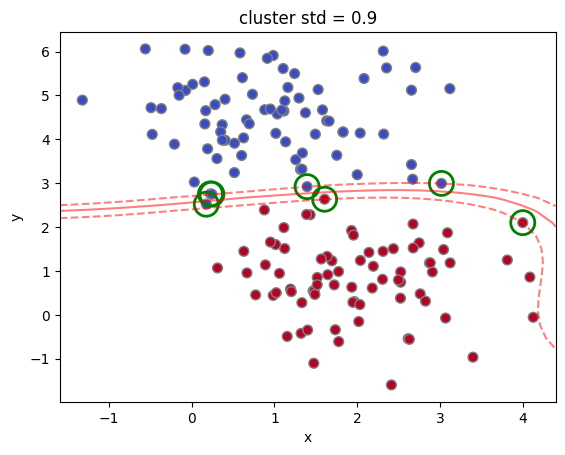

Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
Матрица несоответствий:
 [[18  0]
 [ 0 12]]


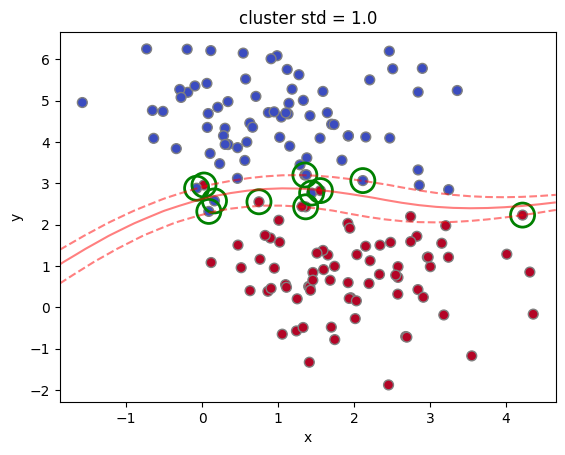

Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
Матрица несоответствий:
 [[18  0]
 [ 0 12]]


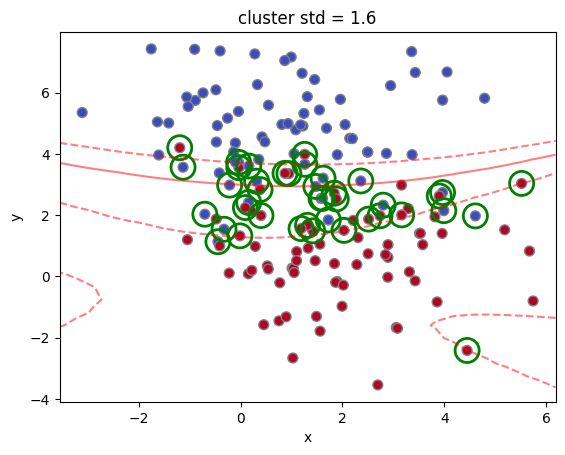

Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
Матрица несоответствий:
 [[18  0]
 [ 0 12]]


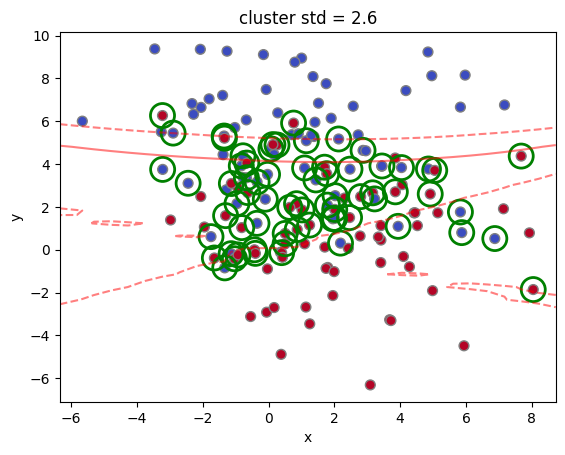

Доля правильных ответов: 0.8666666666666667
Точность: 0.7857142857142857
Полнота: 0.9166666666666666
Площадь под ROC-кривой: 0.8749999999999999
Выпадение: 0.05555555555555555
Матрица несоответствий:
 [[15  3]
 [ 1 11]]


In [ ]:
import matplotlib.pyplot as plt

for i in range(data_count):
  model = SVC(kernel=params[i][2], C=params[i][1])
  clf.fit(x_train[i], y_train[i])

  plt.scatter(x[i][:, 0], x[i][:, 1], c=y[i], edgecolor='grey', s=50, cmap='coolwarm')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('cluster std = ' + str(cluster_stds[i]))
  plot_svc_decision_func(clf)
  plt.show()

  y_pred = clf.predict(x_test[i])
  print_metrics(y_pred, y_test[i])
  print('Матрица несоответствий:\n', confusion_matrix(y_test[i], y_pred))

# Наивный Байесовский классификатор

6. Изучить типы байесовских классификаторов. Представить описание метода, его
математическое представление, особенности, преимущества и недостатки, области
применения.
7. Построить модели изученных байесовских классификаторов. Решить задачу
классификации тех же объектов тестовой выборки (см. п. 3). При необходимости найти
оптимальные значения гиперпараметров. Для каждого случая выполнить проверку качества
полученных моделей (см. п. 5). Сделать выводы.
8. Для каждого случая сравнить результаты классификации, полученные методом
опорных векторов и моделями байесовских классификаторов. Сделать выводы.

Наивный байесовский классификатор (Naive Bayes classifier) — вероятностный классификатор на основе формулы Байеса со строгим (наивным) предположением о независимости признаков между собой при заданном классе

формула Байеса выглядит следующим образом:

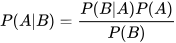
где:

P(A|B) — апостериорная вероятность события A при условии выполнения события B;

P(B|A) — условная вероятность события B при условии выполнения события A;

P(A) и P(B) — априорные вероятности событий A и B соответственно.

А в контексте машинного обучения формула Байеса приобретает следующий вид:

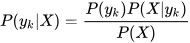
где:

P(yk|X) — апостериорная вероятность принадлежности образца к классу yk с учётом его признаков X;

P(X|yk) — правдоподобие, то есть вероятность признаков X при заданном классе yk;

P(yk) — априорная вероятность принадлежности случайно выбранного наблюдения к классу yk;

P(X) — априорная вероятность признаков X.

Из-за своего низкого качества классификации наивный байесовскими классификатор в основном он используется либо как эталон при экспериментальном сравнении алгоритмов, либо как элементарный строительный блок в алгоритмических композициях.

## Гауссовский наивный байесовский классификатор
Гауссовский наивный байесовский классификатор (GaussianNB) — вариант для работы с непрерывными признаками, которые имеют нормальное (гауссовское) распределение. Вероятность признака при заданном классе вычисляется по формуле:
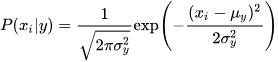


In [ ]:
from sklearn.naive_bayes import GaussianNB

for i in range(data_count):
  model = SVC(kernel=params[i][2], C=params[i][1])
  clf.fit(x_train[i], y_train[i])
  y_pred_svc = clf.predict(x_test[i])

  print('Датасет №', i)
  print('     Метрики метода опорных векторов: ')
  print_metrics(y_pred_svc, y_test[i])
  print('Матрица несоответствий:\n', confusion_matrix(y_test[i], y_pred_svc))

  gnb = GaussianNB()
  y_pred_gnb = gnb.fit(x_train[i], y_train[i]).predict(x_test[i])

  print('     Метрики наивного байесовского классификатора: ')
  print_metrics(y_pred_gnb, y_test[i])
  print('Матрица несоответствий:\n', confusion_matrix(y_test[i], y_pred_gnb))


Датасет № 0
     Метрики метода опорных векторов: 
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
Матрица несоответствий:
 [[18  0]
 [ 0 12]]
     Метрики наивного байесовского классификатора: 
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
Матрица несоответствий:
 [[18  0]
 [ 0 12]]
Датасет № 1
     Метрики метода опорных векторов: 
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
Матрица несоответствий:
 [[18  0]
 [ 0 12]]
     Метрики наивного байесовского классификатора: 
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
Матрица несоответствий:
 [[18  0]
 [ 0 12]]
Датасет № 2
     Метрики метода опорных векторов: 
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
Матрица несоответствий:
 [[18  0]
 [ 0 12]]
     Метрики наивного байесо

## Мультиномиальный наивный байесовский классификатор
Мультиномиальный наивный байесовский классификатор (MultinomialNB) — вариант для работы с дискретными признаками, которые имеют мультиномиальное распределение. Такие признаки часто встречаются в задачах классификации текстов, где они представляют собой количество вхождений в тексте. Вероятность признака при заданном классе вычисляется по формуле:

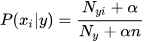

MultinomialNB реализует наивный алгоритм Байеса для полиномиально распределенных данных и является одним из двух классических наивных вариантов Байеса, используемых в классификации текста (где данные обычно представляются как количество векторов слов, хотя векторы tf-idf также известно, что они хорошо работают на практике).

In [ ]:
from sklearn.naive_bayes import MultinomialNB

scale = lambda x: x + 10
x_train = list(map(scale, x_train))
x_test = list(map(scale, x_test))

for i in range(data_count):
  gnb = MultinomialNB()
  y_pred = gnb.fit(x_train[i], y_train[i]).predict(x_test[i])
  print(i)
  print_metrics(y_pred, y_test[i])

0
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
1
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
2
Доля правильных ответов: 0.8333333333333334
Точность: 0.8181818181818182
Полнота: 0.75
Площадь под ROC-кривой: 0.8194444444444443
Выпадение: 0.16666666666666666
3
Доля правильных ответов: 0.7666666666666667
Точность: 0.7272727272727273
Полнота: 0.6666666666666666
Площадь под ROC-кривой: 0.75
Выпадение: 0.2222222222222222


## Комплементарный наивный байесовский классификатор
Комплементарный наивный байесовский классификатор (ComplementNB) — улучшенный вариант MultinomialNB, подходящий для несбалансированных наборов данных. Вместо оценки вероятности признака при заданном классе, алгоритм оценивает нормированный вес признака w_{ci} для класса c как вероятность признака при дополнении класса, то есть при всех остальных классах. Таким образом, алгоритм учитывает не только частоту признаков в классе, но и их отсутствие в других классах, что делает его менее чувствительным к смещению выборки. Формула для вычисления вероятности признака при дополнении класса выглядит следующим образом:

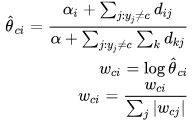

In [ ]:
from sklearn.naive_bayes import ComplementNB

for i in range(data_count):
  gnb = ComplementNB()
  y_pred = gnb.fit(x_train[i], y_train[i]).predict(x_test[i])
  print(i)
  print_metrics(y_pred, y_test[i])

0
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
1
Доля правильных ответов: 0.9333333333333333
Точность: 1.0
Полнота: 0.8333333333333334
Площадь под ROC-кривой: 0.9166666666666667
Выпадение: 0.1111111111111111
2
Доля правильных ответов: 0.8666666666666667
Точность: 1.0
Полнота: 0.6666666666666666
Площадь под ROC-кривой: 0.8333333333333333
Выпадение: 0.2222222222222222
3
Доля правильных ответов: 0.8
Точность: 0.8
Полнота: 0.6666666666666666
Площадь под ROC-кривой: 0.7777777777777777
Выпадение: 0.2222222222222222


## Бернуллиевский наивный байесовский классификатор
Бернуллиевский наивный байесовский классификатор (BernoulliNB) — ещё один вариант для работы с дискретными признаками, но которые имеют бернуллиевское распределение. В данном случае признаки представляют собой бинарные индикаторы наличия или отсутствия определённых свойств в объекте. Например, в задаче классификации текстов это может быть наличие или отсутствие определённых слов в тексте. Вероятность признака при заданном классе вычисляется по формуле:

image.png

In [ ]:
from sklearn.naive_bayes import BernoulliNB

for i in range(data_count):
  gnb = BernoulliNB()
  y_pred = gnb.fit(x_train[i], y_train[i]).predict(x_test[i])
  print(i)
  print_metrics(y_pred, y_test[i])

0
Доля правильных ответов: 0.4
Точность: 0.4
Полнота: 1.0
Площадь под ROC-кривой: 0.5
Выпадение: 0.0
1
Доля правильных ответов: 0.4
Точность: 0.4
Полнота: 1.0
Площадь под ROC-кривой: 0.5
Выпадение: 0.0
2
Доля правильных ответов: 0.4
Точность: 0.4
Полнота: 1.0
Площадь под ROC-кривой: 0.5
Выпадение: 0.0
3
Доля правильных ответов: 0.4
Точность: 0.4
Полнота: 1.0
Площадь под ROC-кривой: 0.5
Выпадение: 0.0


## Категориальный наивный байесовский классификатор
Категориальный наивный байесовский классификатор (CategoricalNB) — вариант для категориально распределенных данных, основанный на предположении, что каждый описываемый индексом признак имеет своё собственное категориальное распределение. Вероятность признака при заданном классе вычисляется по формуле:

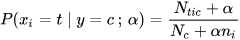

In [ ]:
from sklearn.naive_bayes import CategoricalNB

for i in range(data_count):
  gnb = CategoricalNB()
  y_pred = gnb.fit(x_train[i], y_train[i]).predict(x_test[i])
  print(i)
  print_metrics(y_pred, y_test[i])

0
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
1
Доля правильных ответов: 1.0
Точность: 1.0
Полнота: 1.0
Площадь под ROC-кривой: 1.0
Выпадение: 0.0
2
Доля правильных ответов: 0.9333333333333333
Точность: 1.0
Полнота: 0.8333333333333334
Площадь под ROC-кривой: 0.9166666666666667
Выпадение: 0.1111111111111111
3
Доля правильных ответов: 0.6666666666666666
Точность: 0.5833333333333334
Полнота: 0.5833333333333334
Площадь под ROC-кривой: 0.6527777777777778
Выпадение: 0.2777777777777778


# Выводы
- Лучше всего для данной задачи работает гауссовский наивный байесовский классификатор, безошибочно предсказывающий тестовую выборку первых трех датасетов.
- Метод опорных векторов работает с примерно той же эффективностью, что и наивный байесовский классификатор
- Оба метода работают почти идеально на датасетах с линейно неразделимыми классами, но когда элементы классов слабо отличаются друг от друга (датасет 4), 4 из 12 объектов для метода опорных векторов и байесовского классификатора соответственно предсказываются неправильно.

Список источников

https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.ru/stable/modules/model_evaluation.html#scoring-parameter

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2_(SVM)#:~:text=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2%20(%D0%B0%D0%BD%D0%B3%D0%BB.,%D1%80%D0%B0%D0%B7%D0%B4%D0%B5%D0%BB%D1%8F%D1%8E%D1%89%D0%B5%D0%B9%20%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D1%8B%20%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8%20%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%BC%20%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BE%D0%BC.

https://habr.com/ru/articles/802435/

https://neerc.ifmo.ru/wiki/index.php?title=%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F